This project uses an Appliances Energy Prediction Dataset from [UCI](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction) Machine Learning Repository. The objective of the project is to predict the energy consumption of the appliances using Linear Regression and Support Vector Regression.

The data is logged every 10 minutes for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 minutes. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("/content/energydata.csv", parse_dates=['date'])
dataset.columns = [x.lower() for x in dataset.columns]
dataset = dataset.set_index('date')
dataset.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,rh_5,t6,rh_6,t7,rh_7,t8,rh_8,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   t1           19735 non-null  float64
 3   rh_1         19735 non-null  float64
 4   t2           19735 non-null  float64
 5   rh_2         19735 non-null  float64
 6   t3           19735 non-null  float64
 7   rh_3         19735 non-null  float64
 8   t4           19735 non-null  float64
 9   rh_4         19735 non-null  float64
 10  t5           19735 non-null  float64
 11  rh_5         19735 non-null  float64
 12  t6           19735 non-null  float64
 13  rh_6         19735 non-null  float64
 14  t7           19735 non-null  float64
 15  rh_7         19735 non-null  float64
 16  t8           19735 non-null  float64
 17  rh_8         19735 non-null  float64
 18  t9         

This data set contains 19735 instances and 28 variables with no missing values. 

In [4]:
dataset.describe()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,rh_5,t6,rh_6,t7,rh_7,t8,rh_8,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


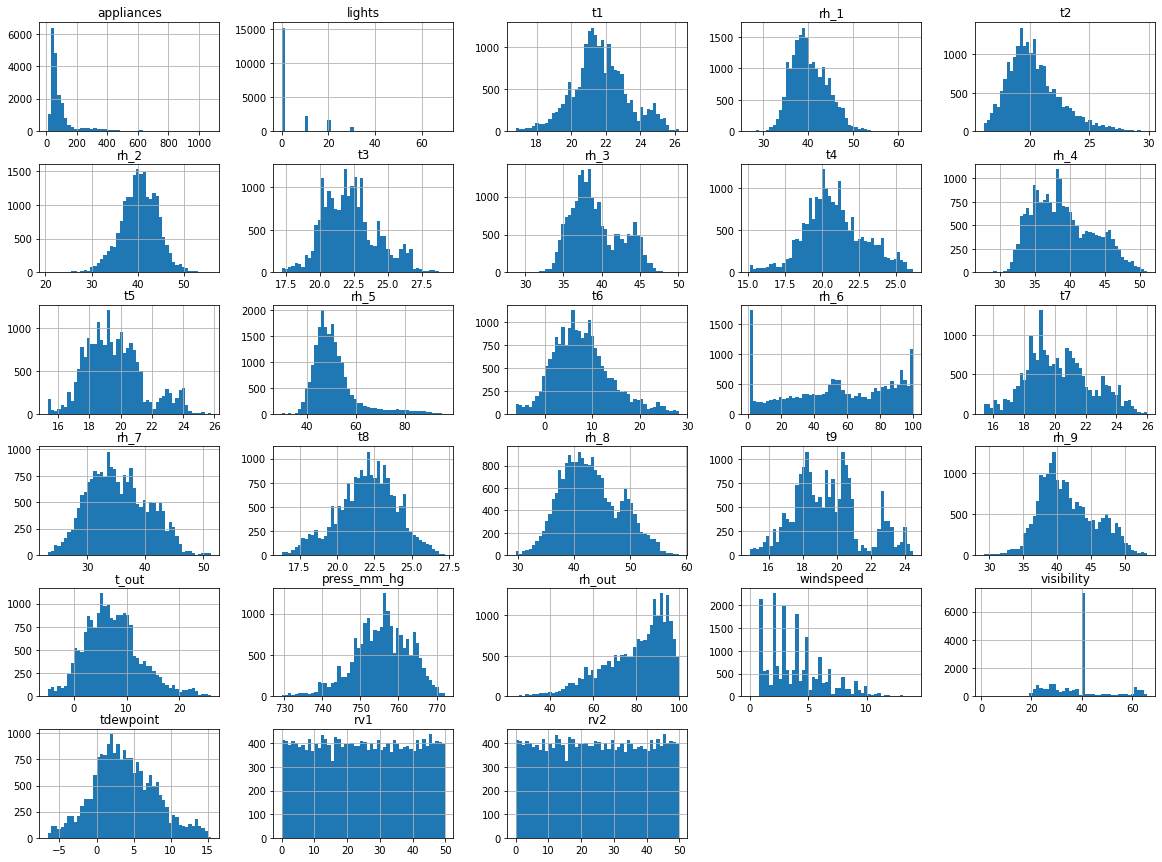

In [5]:
dataset.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")

This plot displays the numerical distribution of each variable. Appliances, lights and windspeed are right skewed while the rh_out which is the outside humidity is left skewed. 

The temperature in most of the spaces appear to have a gaussian distribution, while the random variable 1 and 2 are evenly distributed. 

In some cases, we can see zero values. This is very significant because in energy consumption when a person uses energy, usually zero value isn't present. 


This plot gives an overview of the structure of the data however, it doesn't really show the relationship one variable has with the other. Exploratory Data Analysis (EDA) and Feature Engineering will help reveal that. 

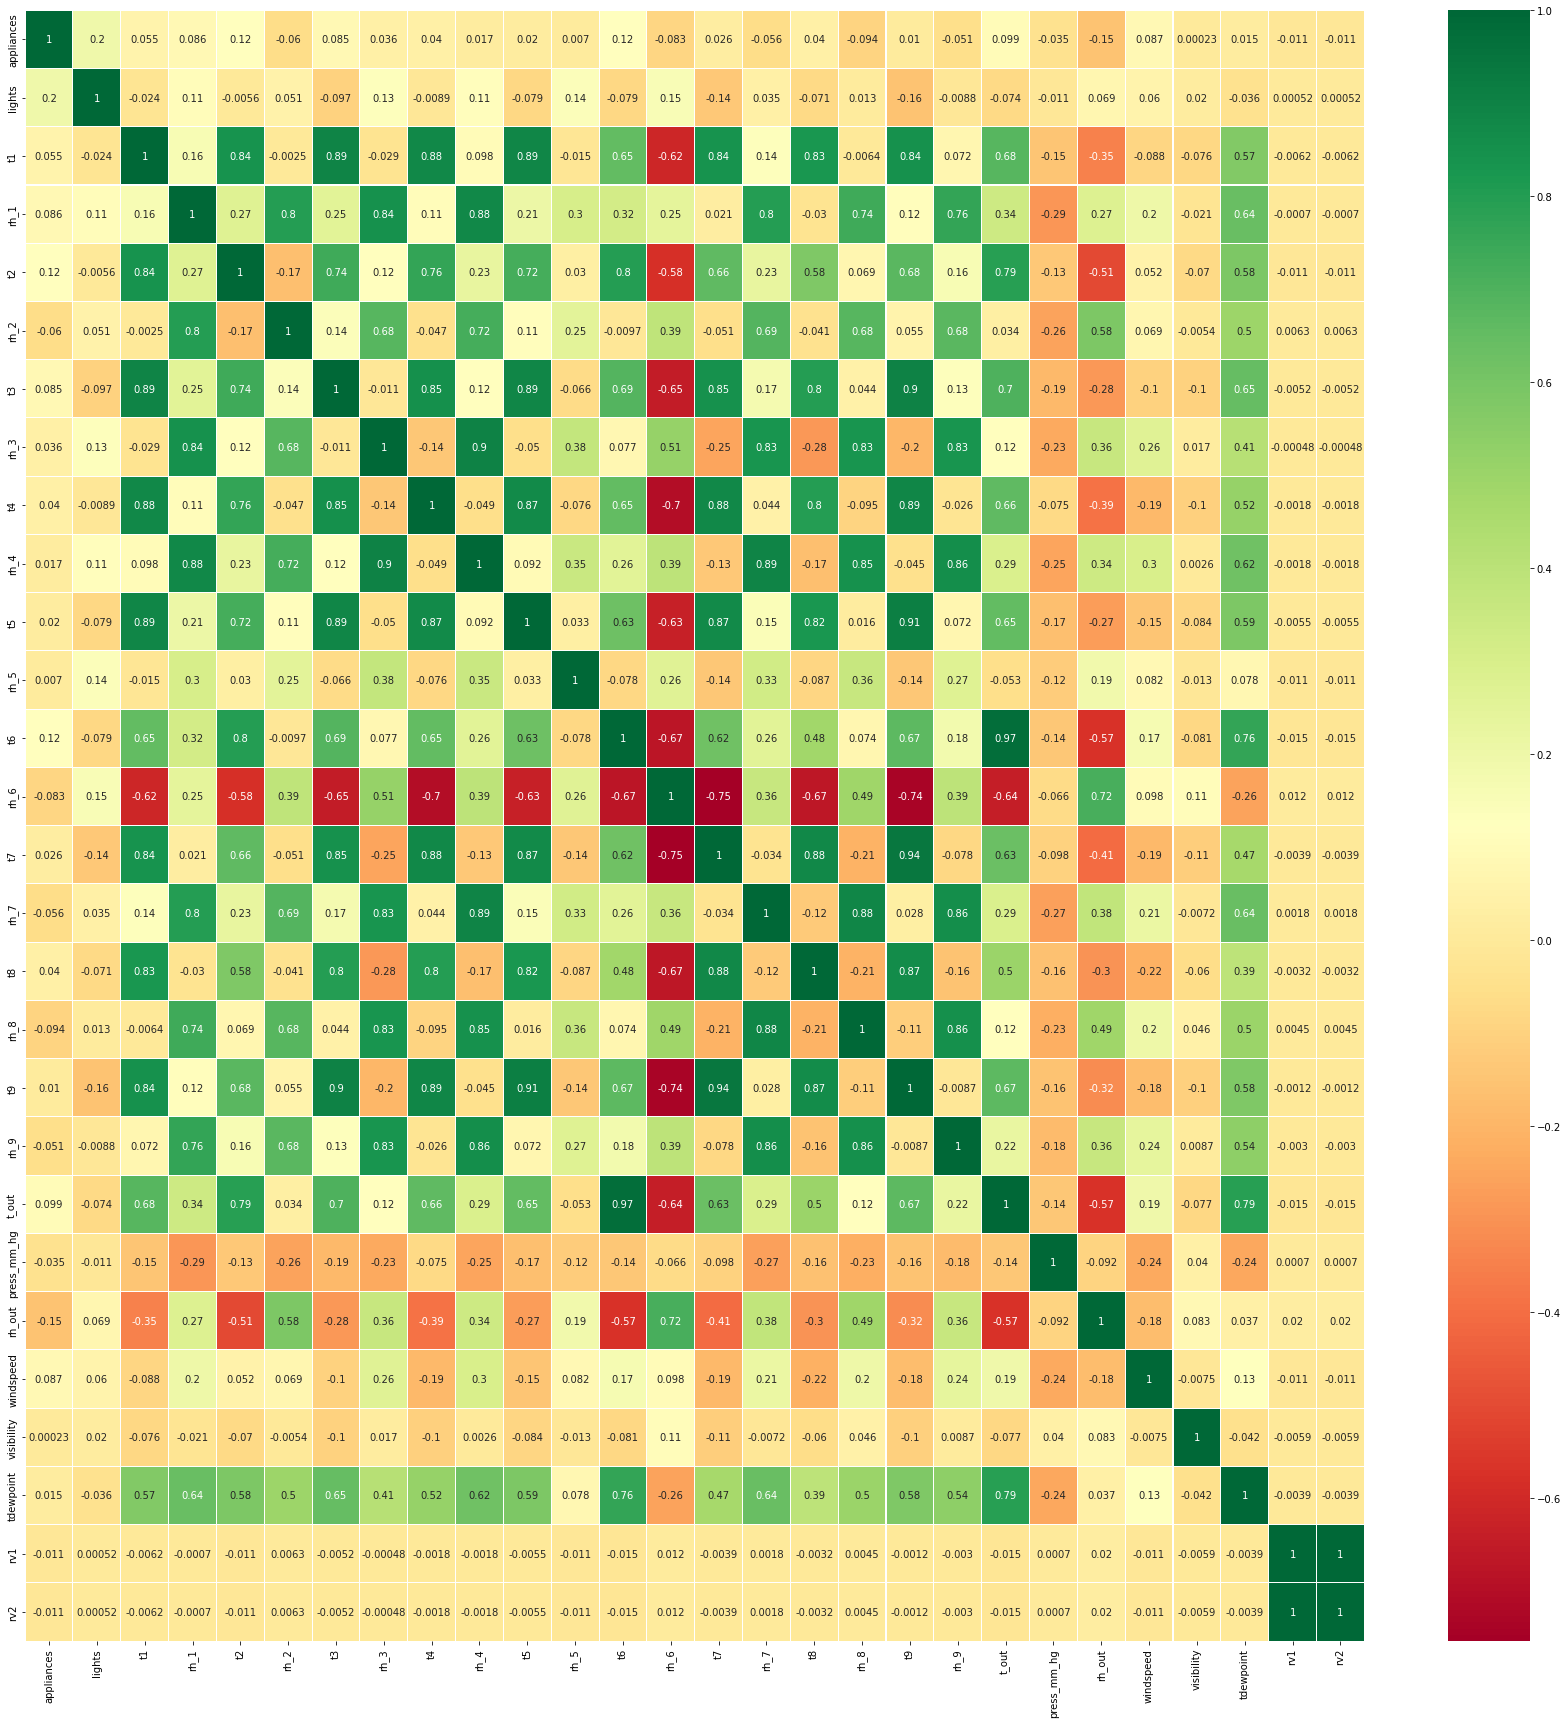

In [6]:
corr = dataset.corr()
plt.figure(figsize=(30,30))
sns.heatmap((corr), linewidths=0.1, cmap='RdYlGn', annot=True)

rh_6 which represents the humidity outside the building has negative correlations with ten (10) variables.

The number of the top 0.01% values of appliances load is 19 and they have power load higher than 790 Wh.


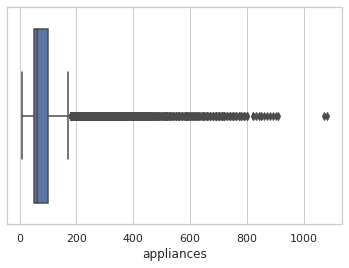

In [7]:
sorted_appliances = dataset.sort_values('appliances', ascending=False)
print("The number of the top 0.01% values of appliances load is", 
      len(sorted_appliances.head(len(sorted_appliances)//1000)),
      "and they have power load higher than", 
      sorted_appliances.appliances[19], "Wh.")

# Create boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(sorted_appliances.appliances)

The box plot displays the distribution of the data points.

From statistics, values that are not outliers are those within the min-max range. This will imply that the values from the max point which is from slightly below 200 to 1000 are outliers. However, all of these data points can't be removed as it will significantly affect the result. Only data points higher than that of the top 1 percent which is 790 will be dropped.

In [8]:
dataset = dataset.dropna()
dataset = dataset.drop(dataset[(dataset.appliances>790)|(dataset.appliances<0)].index)

In [9]:
sorted_appliances = dataset.sort_values('appliances', ascending=False)
sorted_appliances.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,rh_5,t6,rh_6,t7,rh_7,t8,rh_8,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-17 17:40:00,790,10,21.566667,38.626667,20.10,37.040909,20.790000,37.260000,21.066667,36.966667,18.0,46.117500,-1.033333,95.260000,21.365,31.247500,22.500000,39.450000,18.10,37.290000,-0.266667,764.833333,79.666667,2.000000,40.000000,-3.466667,36.170216,36.170216
2016-05-21 09:40:00,790,0,23.000000,50.260000,25.53,43.133333,24.390000,44.490000,23.600000,47.260000,22.5,50.431667,22.200000,7.493333,22.890,43.900000,23.290000,51.090000,23.00,47.462500,16.900000,756.333333,79.666667,4.666667,28.333333,13.333333,44.856357,44.856357
2016-01-14 18:50:00,790,10,22.166667,40.500000,21.70,38.626667,22.166667,42.133333,18.790000,44.626667,17.1,53.900000,4.297500,71.745000,17.700,38.430000,18.823333,45.400000,16.89,42.326667,4.083333,748.433333,76.833333,6.833333,40.000000,0.350000,30.487447,30.487447
2016-04-04 12:20:00,790,0,22.390000,45.563333,22.39,42.966667,25.000000,41.433333,21.600000,43.590000,20.7,49.363333,16.000000,16.763333,21.290,37.863333,23.700000,44.863333,20.60,44.433333,13.466667,749.866667,68.666667,7.000000,40.000000,7.766667,4.089491,4.089491
2016-04-29 11:40:00,780,0,20.133333,37.333333,18.26,39.590000,21.890000,34.260000,19.500000,35.663333,18.6,40.400000,10.630000,35.426667,19.000,32.326667,20.500000,38.090000,18.60,36.466667,7.233333,755.233333,89.000000,4.333333,26.000000,5.500000,44.465602,44.465602


Since this is a time series analysis, the time will be indexed based on four (4) time features; month, week, weekday and hour. This is done to uncover trends and also identify which of these features is best suited for the predictive model. 

In [10]:
# Index the date based on month, week, weekday and hour
dataset['month'] = dataset.index.month
dataset['week'] = dataset.index.week
dataset['weekday'] = dataset.index.weekday
dataset['hour'] = dataset.index.hour
dataset.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,rh_5,t6,rh_6,t7,rh_7,t8,rh_8,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2,month,week,weekday,hour
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,2,0,17
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,2,0,17
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1,2,0,17
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1,2,0,17
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1,2,0,17


In [11]:
# Apply natural log transformation on the appliances 
dataset['log_appliances'] = np.log(dataset.appliances)

In [12]:
# Identify average house temperature and humidity

dataset['house_temp'] = ((dataset.t1 + dataset.t2 + dataset.t3 + dataset.t4 + 
                         dataset.t5 + dataset.t7 + dataset.t8 + dataset.t9)/8)
dataset['house_hum'] = ((dataset.rh_1 + dataset.rh_2 + dataset.rh_3 + dataset.rh_4 +
                         dataset.rh_5 + dataset.rh_7 + dataset.rh_8 + dataset.rh_9)/8)

In [13]:
dataset['house_temp'].head()

date
2016-01-11 17:00:00    18.435000
2016-01-11 17:10:00    18.439167
2016-01-11 17:20:00    18.421667
2016-01-11 17:30:00    18.396250
2016-01-11 17:40:00    18.408750
Name: house_temp, dtype: float64

In [14]:
dataset['house_hum'].head()

date
2016-01-11 17:00:00    46.742500
2016-01-11 17:10:00    46.672708
2016-01-11 17:20:00    46.562917
2016-01-11 17:30:00    46.468750
2016-01-11 17:40:00    46.462917
Name: house_hum, dtype: float64

Remove additive assumption

With this, we can make connections between these intertwined pairs of our features and minimize the assumption that each one is independent from the other.

In [15]:
# Remove additive assumptions

dataset['hour_lights'] = dataset.hour * dataset.lights
dataset['t1rh1'] = dataset.t1 * dataset.rh_1
dataset['t2rh2'] = dataset.t2 * dataset.rh_2
dataset['t3rh3'] = dataset.t3 * dataset.rh_3
dataset['t4rh4'] = dataset.t4 * dataset.rh_4
dataset['t5rh5'] = dataset.t5 * dataset.rh_5
dataset['t6rh6'] = dataset.t6 * dataset.rh_6
dataset['t7rh7'] = dataset.t7 * dataset.rh_7
dataset['t8rh8'] = dataset.t8 * dataset.rh_8
dataset['t9rh9'] = dataset.t9 * dataset.rh_9

In [18]:
# Average energy consumption per weekday and hour
def code_mean(data, cat_feature, real_feature):
  return dict(data.groupby(cat_feature)[real_feature].mean())

With the assumptions already executed, we can now find the average  energy consumption with respect to weekday and hour.

In [19]:
# Average energy consumption per weekday and hour
dataset['weekday_avg'] = list(map(code_mean(dataset[:], 'weekday', 'appliances').get, dataset.weekday))
dataset['hour_avg'] = list(map(code_mean(dataset[:], 'hour', 'appliances').get, dataset.hour))

In [20]:
dataset['weekday_avg'].head()

date
2016-01-11 17:00:00    110.896974
2016-01-11 17:10:00    110.896974
2016-01-11 17:20:00    110.896974
2016-01-11 17:30:00    110.896974
2016-01-11 17:40:00    110.896974
Name: weekday_avg, dtype: float64

In [21]:
dataset['hour_avg'].head()

date
2016-01-11 17:00:00    158.812121
2016-01-11 17:10:00    158.812121
2016-01-11 17:20:00    158.812121
2016-01-11 17:30:00    158.812121
2016-01-11 17:40:00    158.812121
Name: hour_avg, dtype: float64

In [22]:
# Resample data to 30 minutes and 1 hour intervals
dataset_hour = dataset.resample('1H').mean()
dataset_30min = dataset.resample('30min').mean()

In [23]:
dataset_hour.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,rh_5,t6,rh_6,t7,rh_7,t8,rh_8,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2,month,week,weekday,hour,log_appliances,house_temp,house_hum,hour_lights,t1rh1,t2rh2,t3rh3,t4rh4,t5rh5,t6rh6,t7rh7,t8rh8,t9rh9,weekday_avg,hour_avg
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,17.166667,55.116667,6.586667,84.260000,17.177778,41.400000,18.150000,48.710556,17.016667,45.446667,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000,26.823044,26.823044,1.0,2.0,0.0,17.0,4.003184,18.415486,46.554965,595.0,924.940250,856.829333,888.527022,865.964011,946.169778,554.915281,711.162778,884.102611,773.352500,110.896974,158.812121
2016-01-11 18:00:00,176.666667,51.666667,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,17.111111,54.977778,6.180000,87.204444,17.229583,42.046806,18.094444,48.597222,16.981667,45.290000,5.941667,734.266667,91.583333,5.416667,40.000000,4.658333,22.324206,22.324206,1.0,2.0,0.0,18.0,4.722106,18.407726,46.519965,930.0,912.911138,856.285333,886.948467,871.050550,940.731111,538.900833,724.603275,879.339537,769.099683,110.896974,187.426829
2016-01-11 19:00:00,173.333333,25.000000,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,17.136111,55.869861,5.857361,88.131389,17.850000,45.017778,18.156111,49.213333,16.902222,45.311389,6.000000,734.791667,89.750000,6.000000,40.000000,4.391667,33.734932,33.734932,1.0,2.0,0.0,19.0,4.923982,18.685903,48.665312,475.0,1082.595585,918.042333,947.194409,907.027646,957.418201,516.283758,803.639470,893.576233,765.862903,110.896974,141.256098
2016-01-11 20:00:00,125.000000,35.000000,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,17.615556,74.027778,5.469444,86.933889,17.632222,42.920000,18.773333,50.195556,16.890000,45.118889,6.000000,735.283333,87.583333,6.000000,40.000000,4.016667,25.679642,25.679642,1.0,2.0,0.0,20.0,4.793191,18.941007,50.355625,700.0,1015.527493,924.086998,955.471915,944.715828,1305.601119,475.450769,756.810111,942.331767,762.058033,110.896974,126.982968
2016-01-11 21:00:00,103.333333,23.333333,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,18.427222,69.037778,5.578889,86.129444,17.863611,43.618333,19.153333,49.542222,16.890000,44.807778,5.833333,735.566667,87.416667,6.000000,40.000000,3.816667,18.826274,18.826274,1.0,2.0,0.0,21.0,4.636940,19.254063,48.977361,490.0,975.375491,925.660526,940.519133,930.867622,1269.097126,480.490483,779.185664,948.882974,756.803367,110.896974,96.496350


In [24]:
dataset_30min.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,rh_5,t6,rh_6,t7,rh_7,t8,rh_8,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2,month,week,weekday,hour,log_appliances,house_temp,house_hum,hour_lights,t1rh1,t2rh2,t3rh3,t4rh4,t5rh5,t6rh6,t7rh7,t8rh8,t9rh9,weekday_avg,hour_avg
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,56.666667,30.000000,19.890000,46.863333,19.200000,44.713056,19.790000,44.817778,18.975556,45.816389,17.166667,55.163333,6.806667,83.825556,17.200000,41.540000,18.200000,48.831111,17.033333,45.530000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,20.174765,20.174765,1.0,2.0,0.0,17.0,4.033571,18.431944,46.659375,510.000000,932.111700,858.490667,886.943822,869.389633,946.970556,570.661341,714.488000,888.726222,775.528333,110.896974,158.812121
2016-01-11 17:30:00,53.333333,40.000000,19.890000,46.142222,19.200000,44.540000,19.790000,44.977778,18.890000,45.661111,17.166667,55.070000,6.366667,84.694444,17.155556,41.260000,18.100000,48.590000,17.000000,45.363333,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,33.471323,33.471323,1.0,2.0,0.0,17.0,3.972797,18.399028,46.450556,680.000000,917.768800,855.168000,890.110222,862.538389,945.369000,539.169222,707.837556,879.479000,771.176667,110.896974,158.812121
2016-01-11 18:00:00,60.000000,46.666667,19.845556,45.641389,19.200000,44.477778,19.750000,44.863333,18.890000,45.814444,17.122222,54.955556,6.192222,86.580000,17.133333,41.266667,18.100000,48.590000,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,37.243118,37.243118,1.0,2.0,0.0,18.0,4.094345,18.380139,46.362396,840.000000,905.781086,853.973333,886.051567,865.434856,940.962222,536.096252,707.037778,879.479000,769.930000,110.896974,187.426829
2016-01-11 18:30:00,293.333333,56.666667,19.950000,46.116667,19.337778,44.400000,19.790000,44.863333,18.926667,46.318889,17.100000,55.000000,6.167778,87.828889,17.325833,42.826944,18.088889,48.604444,16.963333,45.290000,5.966667,734.366667,91.333333,5.666667,40.000000,4.633333,7.405293,7.405293,1.0,2.0,0.0,18.0,5.349868,18.435313,46.677535,1020.000000,920.041189,858.597333,887.845367,876.666244,940.500000,541.705415,742.168772,879.200074,768.269367,110.896974,187.426829
2016-01-11 19:00:00,260.000000,33.333333,20.273333,52.206667,19.717778,45.111111,19.937778,45.973333,19.000000,47.427778,17.100000,55.251111,6.030278,88.320556,17.916667,45.728889,18.066667,48.806667,16.914444,45.320556,6.000000,734.616667,90.500000,6.000000,40.000000,4.516667,30.682800,30.682800,1.0,2.0,0.0,19.0,5.396805,18.615833,48.228264,633.333333,1058.785585,889.560074,916.680319,901.127778,944.794000,532.611649,819.320252,881.779630,766.571272,110.896974,141.256098


We assume that energy consumption increases as load increases and vice versa. Here, high and low consumption boundaries/thresholds are set to identify if consumption is low or high. 

In [25]:
# Set qualitative predictors

dataset_hour['low_consum'] = (dataset_hour.appliances + 25<(dataset_hour.hour_avg))*1
dataset_hour['high_consum'] = (dataset_hour.appliances + 25>(dataset_hour.hour_avg))*1

dataset_30min['low_consum'] = (dataset_30min.appliances + 25<(dataset_30min.hour_avg))*1
dataset_30min['high_consum'] = (dataset_30min.appliances + 25>(dataset_30min.hour_avg))*1

Text(0, 0.5, 'Appliances consumption in Wh')

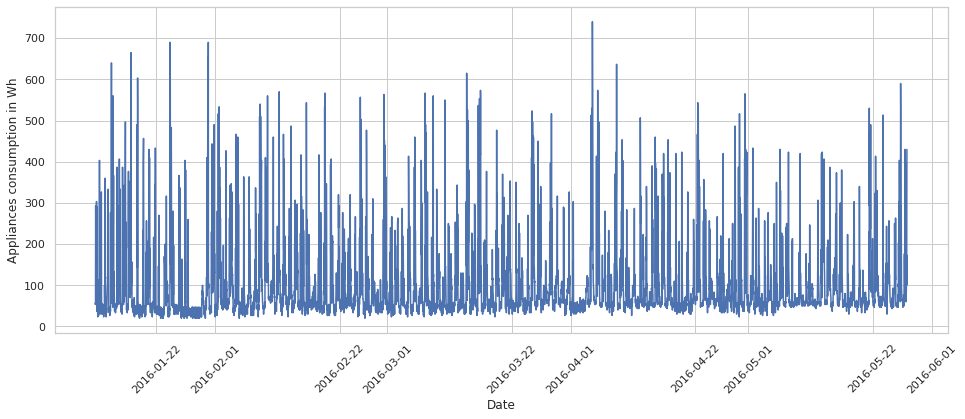

In [26]:
plt.figure(figsize=(16,6))
plt.plot(dataset_30min.appliances)
plt.xticks(rotation='45')
plt.xlabel('Date')
plt.ylabel('Appliances consumption in Wh')

Text(0, 0.5, 'Appliances consumption in Wh')

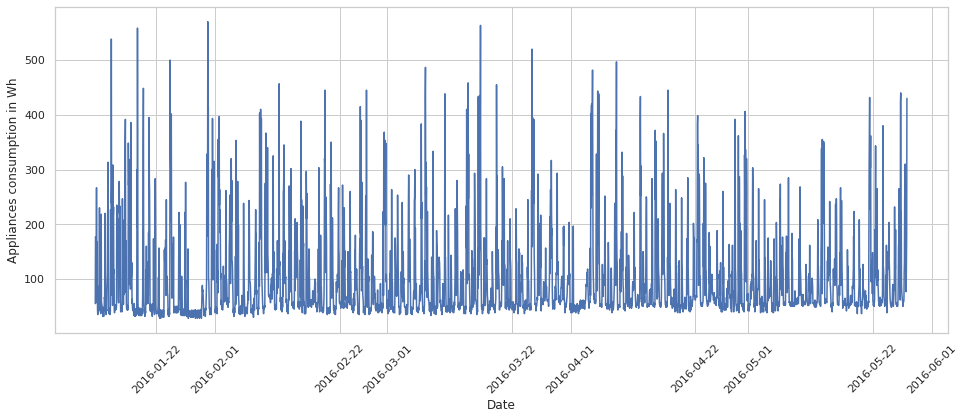

In [27]:
plt.figure(figsize=(16,6))
plt.plot(dataset_hour.appliances)
plt.xticks(rotation='45')
plt.xlabel('Date')
plt.ylabel('Appliances consumption in Wh')

Comparing the 30 minutes and hour interval plots, there's a very slight difference and the values are not very clear to help examine what day of the week or week in each month has the highest energy consumption. 

The groupby method will be used per hour per weekday and per week of the month  to compare the differences with respect to the energy load consumption.

In [29]:
# Define functions to plot the energy consumption daily, hourly and monthly

def daily(x, dataset=dataset):
  return dataset.groupby('weekday')[x].mean()

def hourly(x, dataset=dataset):
  return dataset.groupby('hour')[x].mean()

def monthly_daily(x, dataset=dataset):
  by_day = dataset.pivot_table(index='weekday', columns=['month'], values=x,
                               aggfunc='mean')
  return round(by_day, ndigits=2)

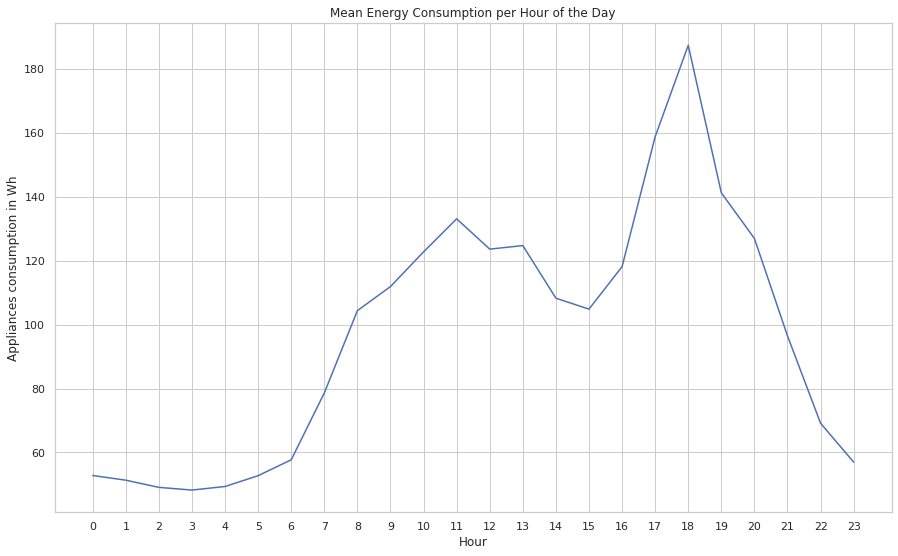

In [30]:
# Plot the hourly energy consumption
hourly('appliances').plot(figsize=(15,9))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of the Day')

plt.xticks(ticks);

There is a significant increase in energy consumption from the 16th hour and peaking at the 18th hour. A logical explanation could be that during this time
occupants of this building are at home, using lots of appliances such as microwave, TVs, etc

There's also a steady decline from the 20th hour and that's expected as occupants gradually retire to bed. 

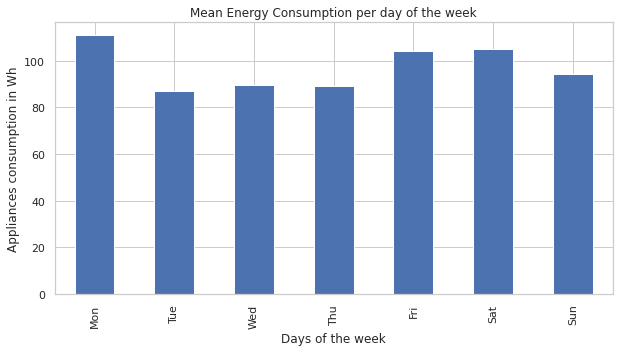

In [31]:
# Energy consumption per day of the week

daily('appliances').plot(kind = 'bar', figsize=(10,5))
ticks = list(range(0, 7, 1))
labels = 'Mon Tue Wed Thu Fri Sat Sun'.split()
plt.xlabel('Days of the week')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per day of the week')

plt.xticks(ticks, labels);


Monday is the day with the most energy consumption closely followed by Friday, Saturday and Sunday.

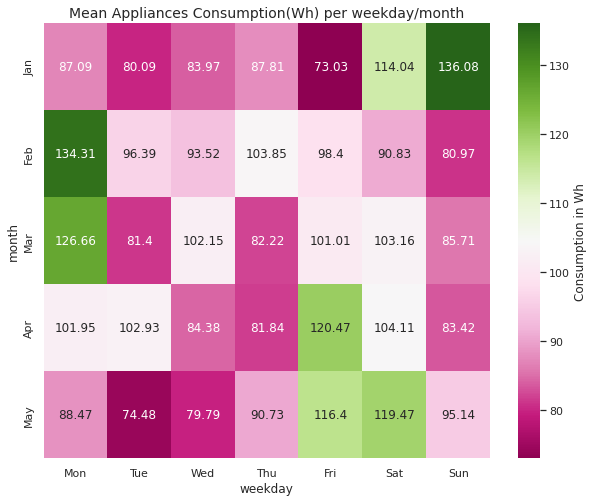

In [32]:
sns.set(rc={'figure.figsize':(10,8)},)
ax=sns.heatmap(monthly_daily('appliances').T,cmap="PiYG", 
               xticklabels="Mon Tue Wed Thu Fri Sat Sun".split(),
               yticklabels="Jan Feb Mar Apr May".split(), annot=True, fmt='g',
               cbar_kws={'label': 'Consumption in Wh'}).set_title("Mean Appliances Consumption(Wh) per weekday/month").set_fontsize('14')

plt.show()

In January, Sunday has the highest energy consumption while Monday was the highest in February and March. April and May has Friday and Saturday respectively. 

This heatmap further validates the weekly energy consumption plot above.

While the month feature is great, in this project it won't be used as a feature for the model as only five (5) months are included and this doesn't give a clear picture for all the months in a year. 

Text(0.5, 0, "Log Appliances' Wh")

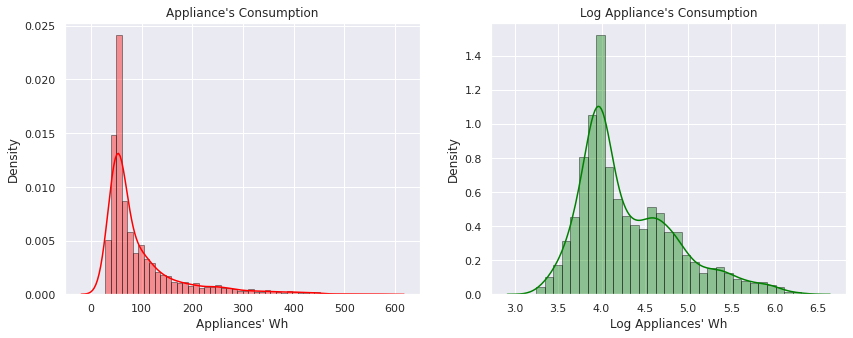

In [34]:
# Histogram of home appliance

f, axes = plt.subplots(1, 2, figsize=(14,5))
sns.distplot(dataset_hour.appliances, hist=True, color='red', hist_kws={'edgecolor':'black'}, ax=axes[0])
axes[0].set_title("Appliance's Consumption")
axes[0].set_xlabel("Appliances' Wh")

sns.distplot(dataset_hour.log_appliances, hist=True, color='green', hist_kws={'edgecolor':'black'}, ax=axes[1])
axes[1].set_title("Log Appliance's Consumption")
axes[1].set_xlabel("Log Appliances' Wh")

Comparing before and after the log transformation, the before is right skewed and after the log transformation the distribution appears normal. 

The reason for this log transformation is that there are a lot of values which are too high in comparison to the values which are within the five number summary (min, first quartile, median, third quartile and max).

There's a need to understand the
correlations of the different features
to identify and select the most relevant
features to be used for
the model

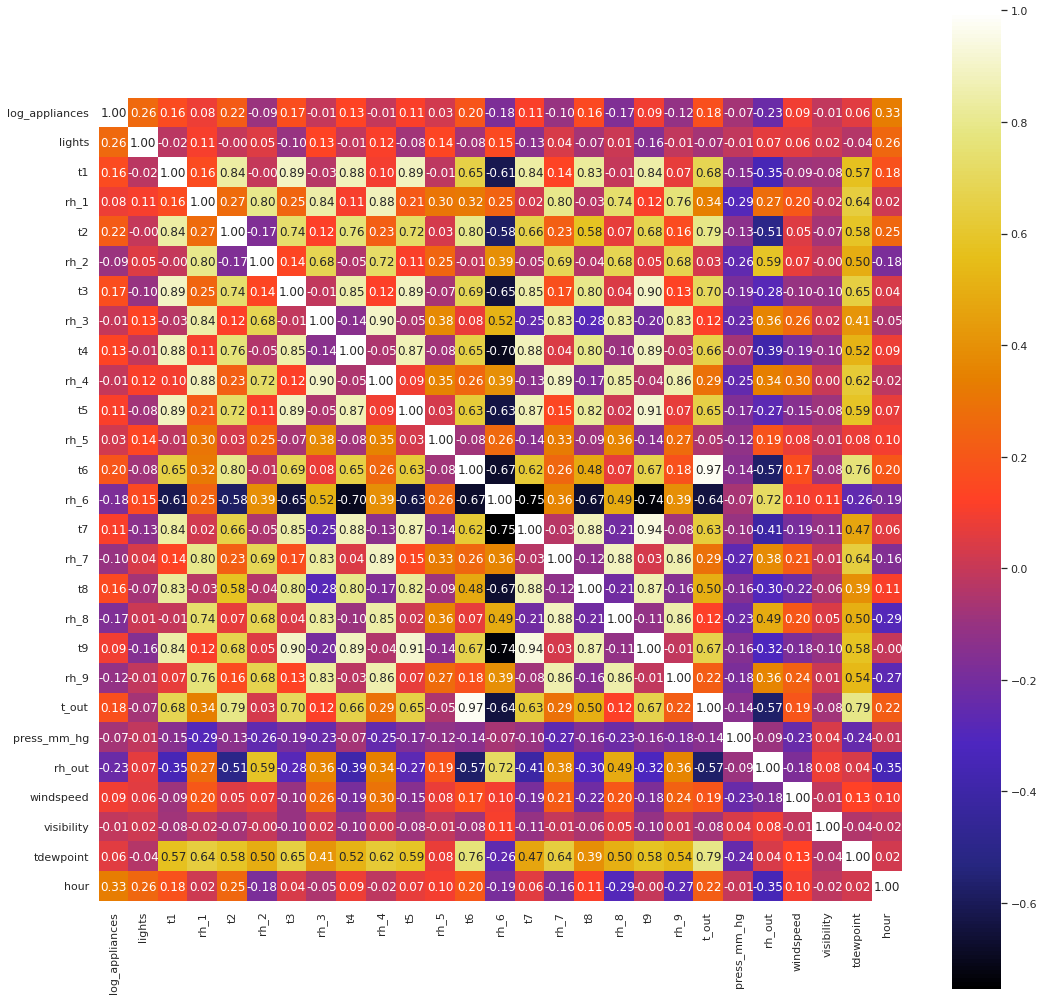

In [35]:
# Correlation of features

col = ['log_appliances', 'lights', 't1', 'rh_1', 't2', 'rh_2', 't3', 'rh_3', 
       't4', 'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7', 't8', 'rh_8',
       't9', 'rh_9', 't_out', 'press_mm_hg', 'rh_out', 'windspeed', 'visibility',
       'tdewpoint', 'hour']
corr = dataset[col].corr()
plt.figure(figsize=(18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar=True, annot=True, square = True, cmap='CMRmap', fmt='.2f',
            xticklabels=col, yticklabels=col)
plt.show();

From this
result we can see that the
features
with high correlation value are
hour, lights, t6, t2, t3, t_out, rh_out,
rh_8, wind speed. 

However, correlation is not the only
metric to use a certain feature or variable for
modeling.

It's important to check
whether there is linear independence in
some of our features
because using this we will also be
dealing with
multicollinearity issues and that should be avoided
else the model will
fail.

Examine linear independence *using* features
with high correlation values.

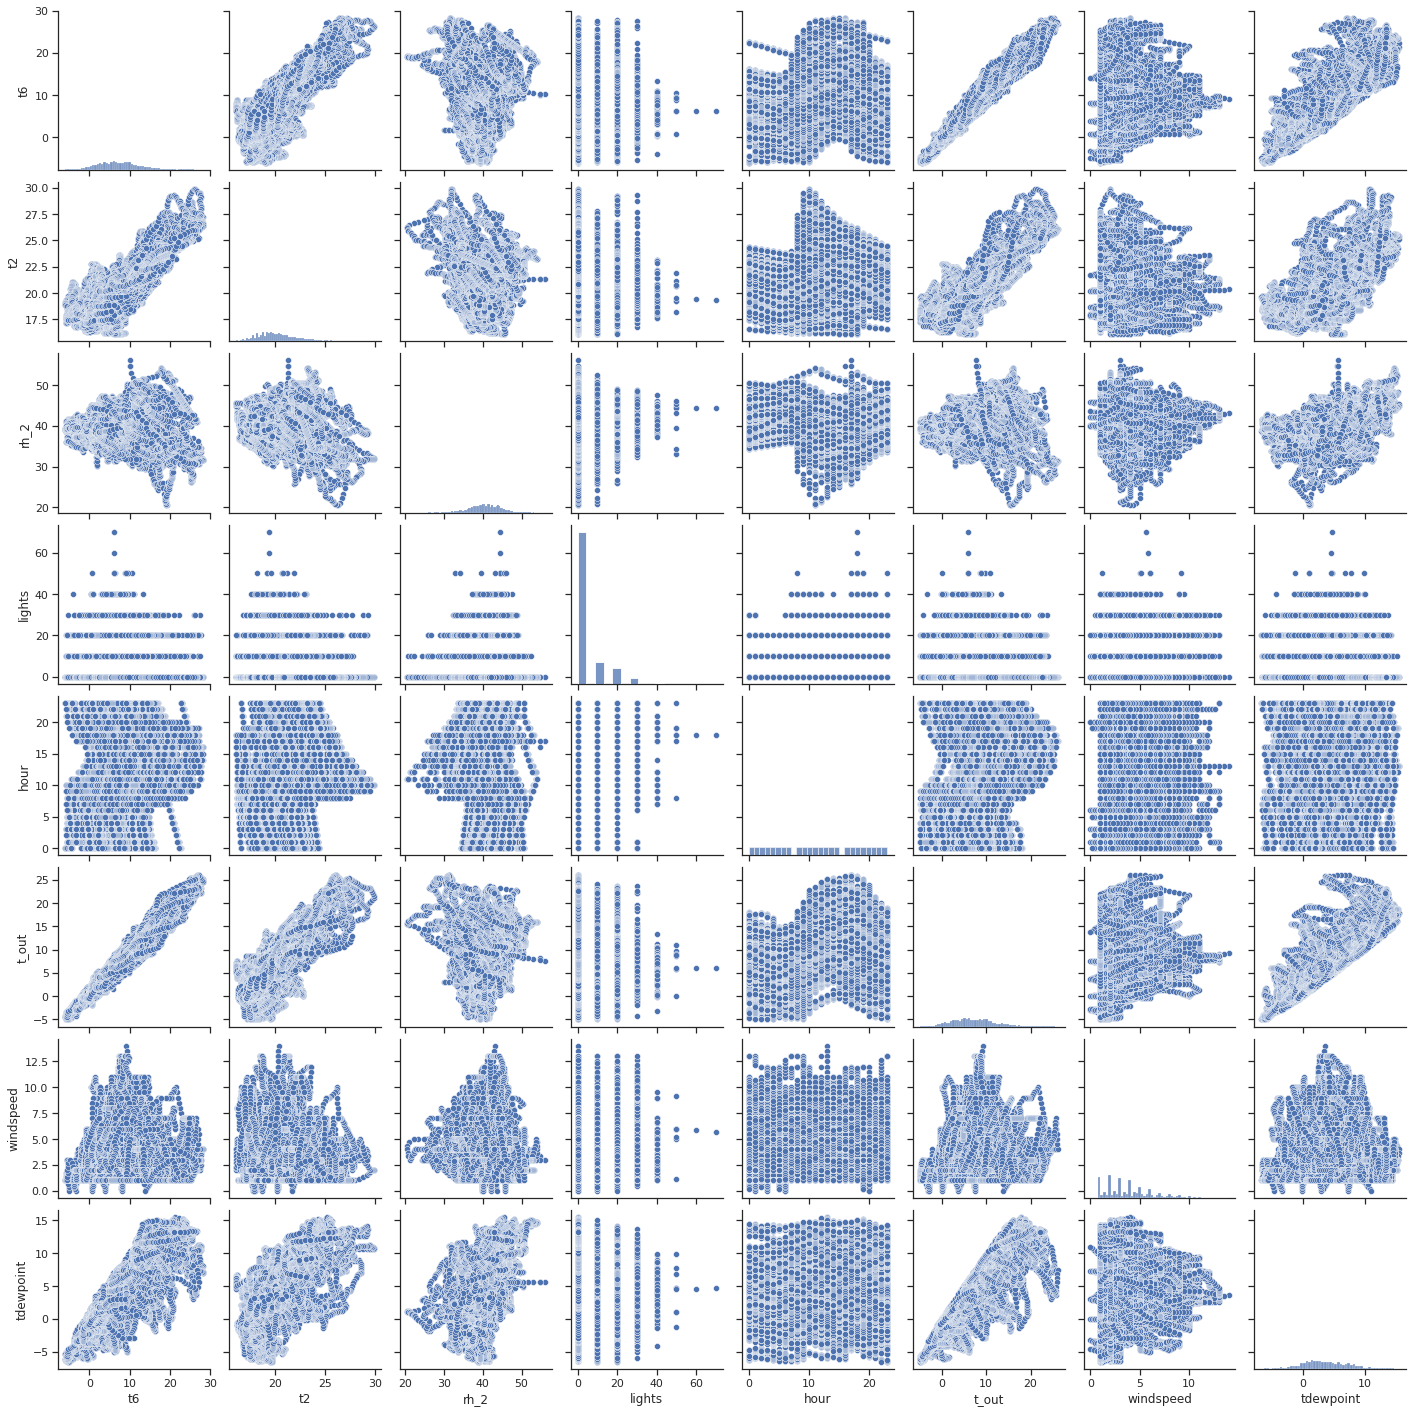

In [36]:
# Examine linear independence
col = ['t6', 't2', 'rh_2', 'lights', 'hour', 't_out', 'windspeed', 'tdewpoint']
sns.set(style="ticks", color_codes=True)
sns.pairplot(dataset[col])
plt.show();

From the pairplot above, we can see that the temperatures in and
outside that is t6, t2 and t_out
are correlated with the dew point. 

This means that there may be an
issue of
multicollinearity if all these
temperature variables are used hence only one will be chosen. 
The temperature
inside the house will be chosen for the model.

## Train the Model

### Transform categorical variables into dummy variables

In [37]:
# Transform categorical variables into dummies

for cat_feature in ['weekday', 'hour']:
  dataset_hour = pd.concat([dataset_hour, pd.get_dummies(dataset_hour[cat_feature])], axis=1)
  dataset_30min = pd.concat([dataset_30min, pd.get_dummies(dataset_30min[cat_feature])], axis=1)
  dataset = pd.concat([dataset, pd.get_dummies(dataset[cat_feature])], axis=1)


For the **linear regression model**, having identified the variables or features which have higher correlations and the linear independence of this
correlation from the pairplot, the selected features are used for the model.

For the **SVR model**, the features selection uses a different technique being that the algorithm acknowledges the presence of non-linearity in the data and provides a proficient prediction model.



In [38]:
# Set the models to be trained

#Linear Model
model1 = ['low_consum', 'high_consum', 'hour', 't6', 'rh_6', 'lights', 
             'hour_lights', 'windspeed', 't6rh6']

#SVR Model
model2 = ['low_consum', 'high_consum', 'hour', 't1', 'rh_1','t2', 'rh_2', 't3', 'rh_3',
          't4', 'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7', 't8', 'rh_8',
          't9', 'rh_9', 't_out', 'rh_out', 'tdewpoint', 'lights', 'press_mm_hg',
          'visibility', 'windspeed']


Data type is changed to float to avoid warnings from the result of the chosen features

In [39]:
dataset_hour.lights = dataset_hour.lights.astype(float)
dataset_hour.log_appliances = dataset_hour.log_appliances.astype(float)
dataset_hour.hour = dataset_hour.hour.astype(float)
dataset_hour.low_consum = dataset_hour.low_consum.astype(float)
dataset_hour.high_consum = dataset_hour.high_consum.astype(float)
dataset_hour.t6rh6 = dataset_hour.t6rh6.astype(float)

## Split into training and test set

In [40]:
# Split into training and test set

test_size = 0.2
test_index = int(len(dataset_hour.dropna())*(1-test_size))

# Linear Model
X1_train, X1_test = dataset_hour[model1].iloc[:test_index,], dataset_hour[model1].iloc[test_index:,]
y1_train = dataset_hour.log_appliances.iloc[:test_index,]

# SVR Model
X2_train, X2_test = dataset_hour[model2].iloc[:test_index,], dataset_hour[model2].iloc[test_index:,]
y2_train = dataset_hour.log_appliances.iloc[:test_index,]


y_test = dataset_hour.log_appliances.iloc[test_index:,]

### Standardize

In [41]:
# Normalize matrix x

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

scaler.fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

In [42]:
# Train the model with default hyperparameters

from sklearn import linear_model

lin_model = linear_model.LinearRegression()
lin_model.fit(X1_train, y1_train)

LinearRegression()

In [43]:
from sklearn.svm import SVR

svr_model = SVR(gamma='scale')
svr_model.fit(X2_train, y2_train)

SVR()

### Model Evaluation and Selection

Mean Squared Error and R2 Score are the metrics that will be used to evaluate the effectiveness of the model. 

In [44]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict

Model is evaluated based on the test features

In [45]:
# Define a function to evaluate the model

def evaluate(model, test_features, test_labels):
  predictions = model.predict(test_features)
  errors = abs(predictions - test_labels)
  mape = np.mean(errors/test_labels) * 100
  accuracy = 100 - mape  
  r_score = r2_score(test_labels, predictions) * 100

  print(model, '\n')
  print('Average Error       : {:0.4f} degrees'.format(np.mean(errors)))
  print('Variance Score R^2  : {:0.2f}%'.format(r_score))
  print('Accuracy            : {:0.2f}%\n'.format(accuracy))

In [46]:
evaluate(lin_model, X1_test, y_test)
evaluate(svr_model, X2_test, y_test)

LinearRegression() 

Average Error       : 0.3494 degrees
Variance Score R^2  : 14.00%
Accuracy            : 91.87%

SVR() 

Average Error       : 0.3319 degrees
Variance Score R^2  : 27.37%
Accuracy            : 92.41%



From the results above there's a slight different in accuracy score however, the variance score of SVR almost doubles that of the linear model. This makes SVR an initial model choice. The Time Series Split will be used to further evaluate the model performance. 

In [48]:
cv = TimeSeriesSplit(n_splits = 10)

print('Linear Model:')
scores = cross_val_score(lin_model, X1_train, y1_train, cv=cv, scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100 + scores.mean(), scores.std() * 2))
scores = cross_val_score(lin_model, X1_train, y1_train, cv=cv, scoring='r2')
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('SVR Model:')
scores = cross_val_score(svr_model, X2_train, y2_train, cv=cv, scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100 + scores.mean(), scores.std() * 2))
scores = cross_val_score(svr_model, X2_train, y2_train, cv=cv, scoring='r2')
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

Linear Model:
Accuracy: 99.64 (+/- 0.06) degrees
R^2: 0.26 (+/- 0.22) degrees
SVR Model:
Accuracy: 99.69 (+/- 0.11) degrees
R^2: 0.48 (+/- 0.19) degrees


Both models have very similar accuracy score. However, the r squared score of the SVR model at 0.48 is significantly higher than that of the linear model which is 0.26. This means that the SVR model outperforms the linear model

Text(0.5, 0.01, 'Fitted Values')

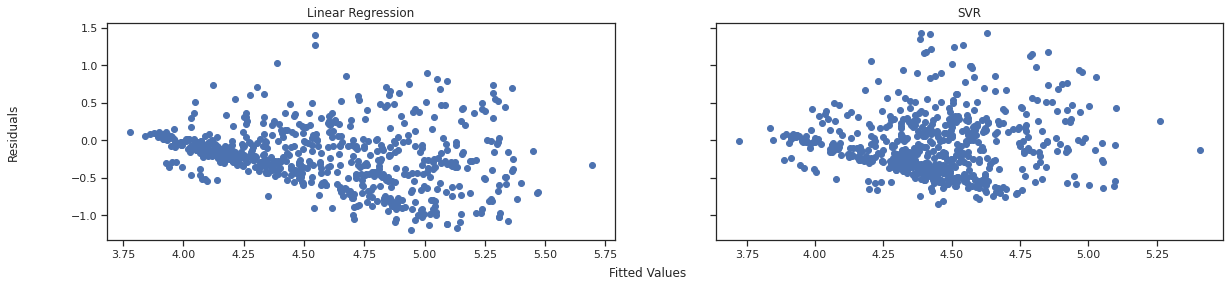

In [50]:
y1_pred = lin_model.predict(X1_test)
y2_pred = svr_model.predict(X2_test)

fig, ax = plt.subplots(1, 2, figsize=(20,4), sharey=True)
ax[0].scatter(y1_pred, y_test-y1_pred)
ax[0].set_title('Linear Regression')

ax[1].scatter(y2_pred, y_test-y2_pred)
ax[1].set_title('SVR')

fig.text(0.06, 0.5, 'Residuals', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.01, 'Fitted Values', ha='center', va='center')

The SVR model shows higher variance when compared to the linear model as the data in the linear model is more spread out.

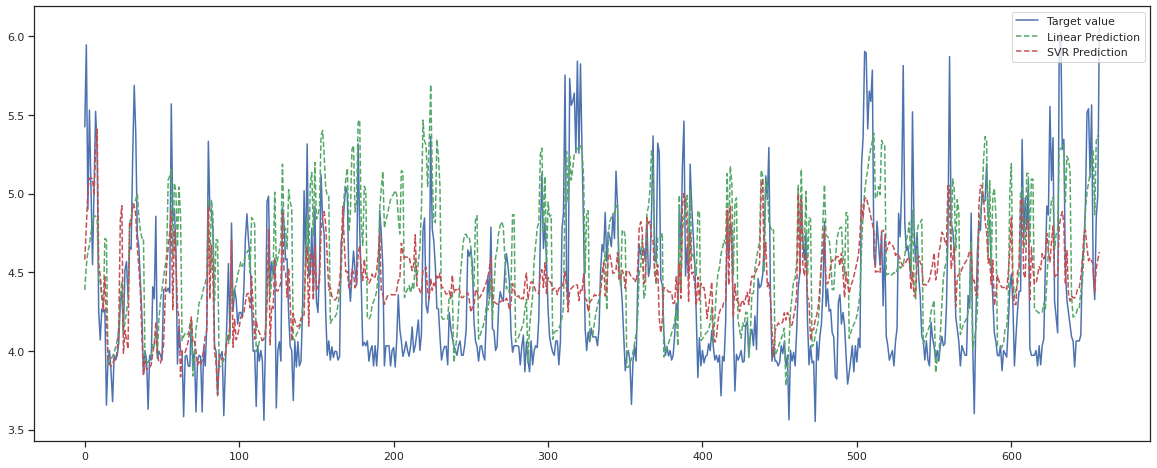

In [51]:
fig = plt.figure(figsize=(20,8))
plt.plot(y_test.values, label='Target value', color='b')
plt.plot(y1_pred, label='Linear Prediction', linestyle='--', color='g')
plt.plot(y2_pred, label='SVR Prediction', linestyle='--', color='r')

plt.legend(loc=1)

The line plot displays the true values of the prediction. The linear prediction appears overfitted while that of SVR is more generalized.

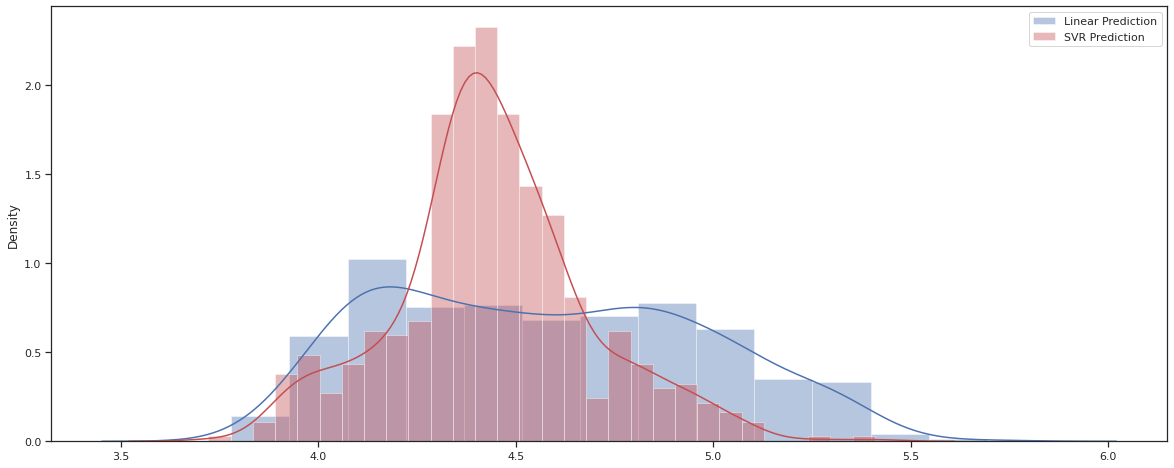

In [52]:
fig = plt.figure(figsize=(20,8))
sns.distplot(y1_pred, label='Linear Prediction', color='b')
sns.distplot(y2_pred, label='SVR Prediction', color='r')


plt.legend(loc=1)

The blue plot represents the linear model while the red represents the SVR model. The SVR model shows a normal distribution compared to the linear model. 

## Conclusion

The SVR model outperforms the linear model hence it should be considered the choice model for deployment or production.